爆大量，超平台，當天上漲

第二步：

爆大量後回檔，超平台，當天上漲

In [1]:
from functions import plotting_strat1

returns:  [-0.027675276752767486, -0.1577060931899642, 0.11971830985915499, 0.11605415860735002, 0.07344632768361592, 0.06227758007117434, 0.026981450252951067]
avg per trade:  0.03044235093307352
winrate:  0.7142857142857143
[[51, Timestamp('2023-03-29 00:00:00'), 2710.0], [109, Timestamp('2023-06-27 00:00:00'), 2790.0], [137, Timestamp('2023-08-07 00:00:00'), 2130.0], [170, Timestamp('2023-09-21 00:00:00'), 2585.0], [197, Timestamp('2023-11-02 00:00:00'), 2655.0], [220, Timestamp('2023-12-05 00:00:00'), 2810.0], [239, Timestamp('2024-01-02 00:00:00'), 2965.0], [307, Timestamp('2024-04-19 00:00:00'), 3000.0]]
[[64, Timestamp('2023-04-20 00:00:00'), 2635.0], [121, Timestamp('2023-07-13 00:00:00'), 2350.0], [151, Timestamp('2023-08-25 00:00:00'), 2385.0], [182, Timestamp('2023-10-12 00:00:00'), 2885.0], [210, Timestamp('2023-11-21 00:00:00'), 2850.0], [231, Timestamp('2023-12-20 00:00:00'), 2985.0], [253, Timestamp('2024-01-22 00:00:00'), 3045.0]]
return: 0.2612619765336819
12612.619765

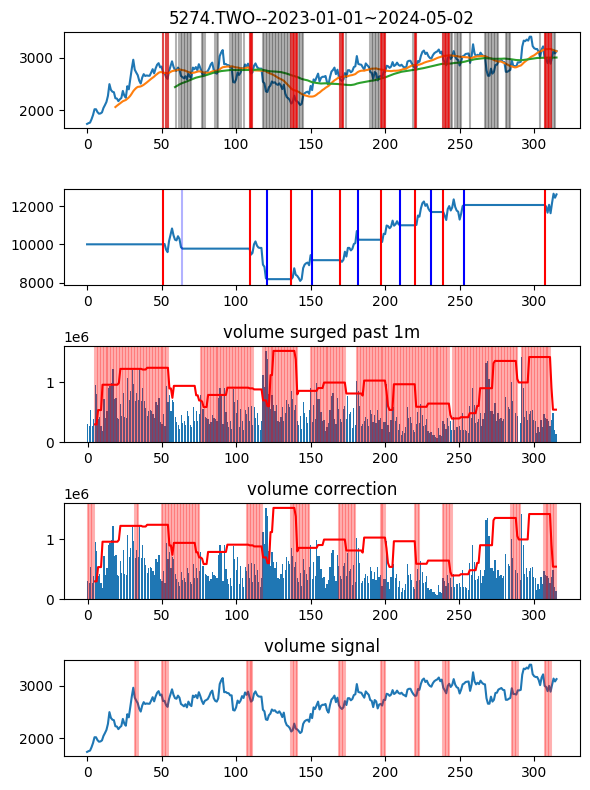

In [8]:
df = plotting_strat1(ticker='5274.TWO', start='2023-01-01', end='2024-05-02')


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_43627/1078904358.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9543.859649122807' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cur[i] = current_open
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[168, 1425.0], [197, 1520.0], [239, 1670.0], [279, 1490.0]]
[[179, 1425.0], [210, 1740.0], [253, 1715.0], [292, 1240.0]]
return: 0.34378650824996737
13437.865082499673


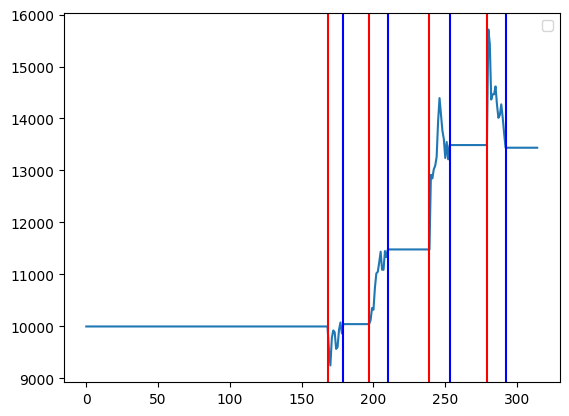

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
start = 10000.0
# ind = df[df['signal_vol_ma_final'] == True].index
# print(ind)
cur = pd.Series([0] * len(df))
cur[0] = start
open_position = []
close_position = []

current = start
holding = False
df['pct_change'] = df['Close'].pct_change()
k = 0
pct_change_all = 0
for i in range(len(df)):
    if df['signal'].iloc[i] == False and holding == False:
        cur[i] = current
        continue
    else:
        if holding == False:
            open_position.append([i, df['Close'].iloc[i]])
            buy_price = df['Close'].iloc[i]
            cur[i] = current
            holding = True
        elif holding == True:
            if df['signal'].iloc[i] == True:
                k = 0
            pct_change = df['pct_change'].iloc[i]
            pct_change_all += pct_change
            current_open = current * (1+pct_change_all)
            # print(current, pct_change, pct_change_all, current_open, i)
            if k == 10:
                close_position.append([i, df['Close'].iloc[i]])
                holding = False
                current = current_open
                k = 0
            cur[i] = current_open
            
            k += 1
if k != 1:
    close_position.append([i, df['Close'].iloc[i], k-1])
plt.plot(cur)
plt.legend()
for i in open_position:
    plt.axvline(i[0], color='r')
for i in close_position:
    plt.axvline(i[0], color='b')

print(open_position)
print(close_position)
print(f"return: {cur[len(df)-1]/cur[0] - 1}")
print(cur[len(df) - 1])